importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
##data preprocessing 

In [3]:
import tensorflow as tf
print(tf.__version__)


2.10.0


### training preprocessing 

##  it is for loading the image from keras directly 

In [6]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [7]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 10.5   17.5    0.25]
   [ 13.    20.     2.  ]
   [ 17.    24.     6.  ]
   ...
   [ 36.5   60.5   12.5 ]
   [ 32.5   56.5    8.5 ]
   [ 30.25  54.25   6.25]]

  [[ 12.5   19.5    2.  ]
   [ 19.25  26.25   8.25]
   [ 18.25  25.25   7.25]
   ...
   [ 32.5   56.5    8.5 ]
   [ 36.    60.    12.  ]
   [ 35.    59.     9.  ]]

  [[ 18.    26.     5.  ]
   [ 23.25  31.25  10.25]
   [ 20.5   28.5    7.5 ]
   ...
   [ 32.25  56.25   8.25]
   [ 44.    68.    20.  ]
   [ 45.    69.    21.  ]]

  ...

  [[109.   134.5   91.  ]
   [108.75 133.75  92.25]
   [ 99.25 121.25  83.5 ]
   ...
   [145.   161.   125.  ]
   [144.   155.   121.  ]
   [117.75 124.75  90.75]]

  [[109.25 134.25  94.25]
   [110.75 135.5   97.  ]
   [106.75 128.    94.25]
   ...
   [144.25 160.25 124.25]
   [145.   156.   122.  ]
   [122.   129.    95.  ]]

  [[109.   134.    95.  ]
   [108.5  132.5   96.5 ]
   [104.25 125.25  93.75]
   ...
   [142.75 158.75 122.75]
   [138.   149.   115.  ]
   [115.5  122.5   8

## building the neural network

### to avoid the overshotting 
1. choose a small larning rate default 0.001 we r taking 0.0001
2. there may  be chance of underfitting, so we can increase the noof neurons dense units =1500 from 1024
3. adding more convol layers  so we can get more features from the images

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten ,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model=Sequential()

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) 

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))  

In [21]:
model.add(Dense(units=38,activation='softmax'))

In [22]:
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

model trainnig

In [24]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 2998s 1s/step - loss: 1.3616 - accuracy: 0.5974 - val_loss: 0.5574 - val_accuracy: 0.8223
Epoch 2/10
2197/2197 [==============================] - 3081s 1s/step - loss: 0.4454 - accuracy: 0.8574 - val_loss: 0.2968 - val_accuracy: 0.9051
Epoch 3/10
2197/2197 [==============================] - 3126s 1s/step - loss: 0.2600 - accuracy: 0.9157 - val_loss: 0.1837 - val_accuracy: 0.9416
Epoch 4/10
2197/2197 [==============================] - 2938s 1s/step - loss: 0.1806 - accuracy: 0.9405 - val_loss: 0.1703 - val_accuracy: 0.9484
Epoch 5/10
2197/2197 [==============================] - 3061s 1s/step - loss: 0.1327 - accuracy: 0.9564 - val_loss: 0.1700 - val_accuracy: 0.9470
Epoch 6/10
2197/2197 [==============================] - 2991s 1s/step - loss: 0.1070 - accuracy: 0.9649 - val_loss: 0.1401 - val_accuracy: 0.9561
Epoch 7/10
2197/2197 [==============================] - 2812s 1s/step - loss: 0.0845 - accuracy: 0.9719 - val_loss: 0.1141 -

In [ ]:
## when we r using the adam value it was taking a lots and lots of time to run the 10 epochs  .. so insread of directly taking this 
## adam values we will refer the documentation tf.keras.optimizer.adam .. then we willtake it from there and copy the path ... this overshooting process named was happening 
## all these provess called overshooting 
# even after this adam optimiser i am unable to solve it 


In [25]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 496s 226ms/step - loss: 0.0365 - accuracy: 0.9882


In [26]:
print(train_loss,train_acc)

0.036465175449848175 0.9882495403289795


In [27]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 111s 202ms/step - loss: 0.1372 - accuracy: 0.9611


In [28]:
print(val_loss,val_acc)

0.13718408346176147 0.9610744118690491


In [29]:
###saving the model

In [30]:
model.save("trained_model.h5")

In [31]:
model.save("trained_model.keras")

In [32]:
training_history.history

{'loss': [1.3616435527801514,
  0.4453733563423157,
  0.26001599431037903,
  0.18059316277503967,
  0.13274645805358887,
  0.10698331147432327,
  0.08454008400440216,
  0.07203051447868347,
  0.06242174282670021,
  0.053320929408073425],
 'accuracy': [0.597353994846344,
  0.8574151992797852,
  0.9157266020774841,
  0.9405078887939453,
  0.9564406871795654,
  0.9648908376693726,
  0.9719467759132385,
  0.9759015440940857,
  0.9800981283187866,
  0.9824454188346863],
 'val_loss': [0.5573819875717163,
  0.29681655764579773,
  0.18368713557720184,
  0.17034971714019775,
  0.16999082267284393,
  0.14013133943080902,
  0.11408224701881409,
  0.18666155636310577,
  0.13113225996494293,
  0.13718414306640625],
 'val_accuracy': [0.8223309516906738,
  0.9051331877708435,
  0.9415547251701355,
  0.9484407305717468,
  0.9470179677009583,
  0.9561233520507812,
  0.963862955570221,
  0.9442863464355469,
  0.9606191515922546,
  0.9610744118690491]}

In [ ]:
# recording the history 

In [33]:
import json 
with open("trainig_hist.json","w") as f:
    json.dump(training_history.history,f)
    

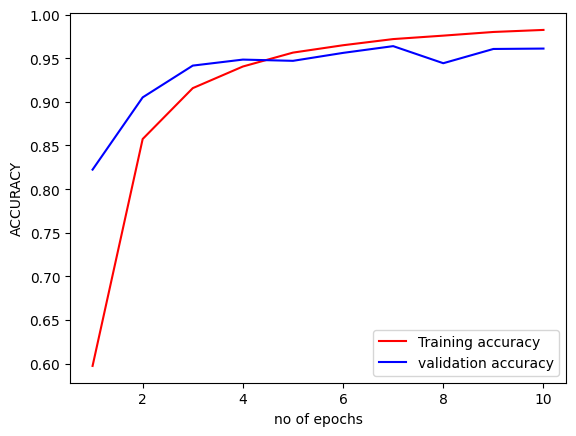

In [36]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel("no of epochs")
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [37]:
### metrices for model evalution 

In [38]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [39]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [40]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 108s 195ms/step


(array([[9.99988914e-01, 7.68193149e-06, 1.45207082e-10, ...,
         3.43102655e-14, 1.64912287e-13, 3.61084101e-13],
        [9.99889135e-01, 1.10300192e-04, 2.91341884e-09, ...,
         1.02419165e-13, 3.40368489e-12, 3.31585844e-12],
        [9.99999523e-01, 1.48386519e-07, 7.00287744e-11, ...,
         1.06358824e-16, 1.59421443e-14, 1.04738749e-14],
        ...,
        [5.16775072e-14, 1.69040978e-15, 1.10728354e-11, ...,
         2.01396059e-16, 6.63546891e-15, 1.00000000e+00],
        [2.60979304e-14, 5.23175353e-16, 3.82496899e-12, ...,
         1.39386484e-16, 1.03594010e-14, 1.00000000e+00],
        [3.10858920e-18, 3.85307127e-20, 2.11615714e-18, ...,
         1.49167516e-20, 7.71950465e-16, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [41]:
predicted_categories=tf.argmax(y_pred,axis=1)


In [42]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [44]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.92      0.93       504
                                 Apple___Black_rot       0.95      1.00      0.97       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.97       440
                                   Apple___healthy       1.00      0.85      0.92       502
                               Blueberry___healthy       0.94      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.96      0.94       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

In [47]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[465,  10,   1, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 435, ...,   0,   1,   2],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   0, ...,   0,   0, 474]], dtype=int64)

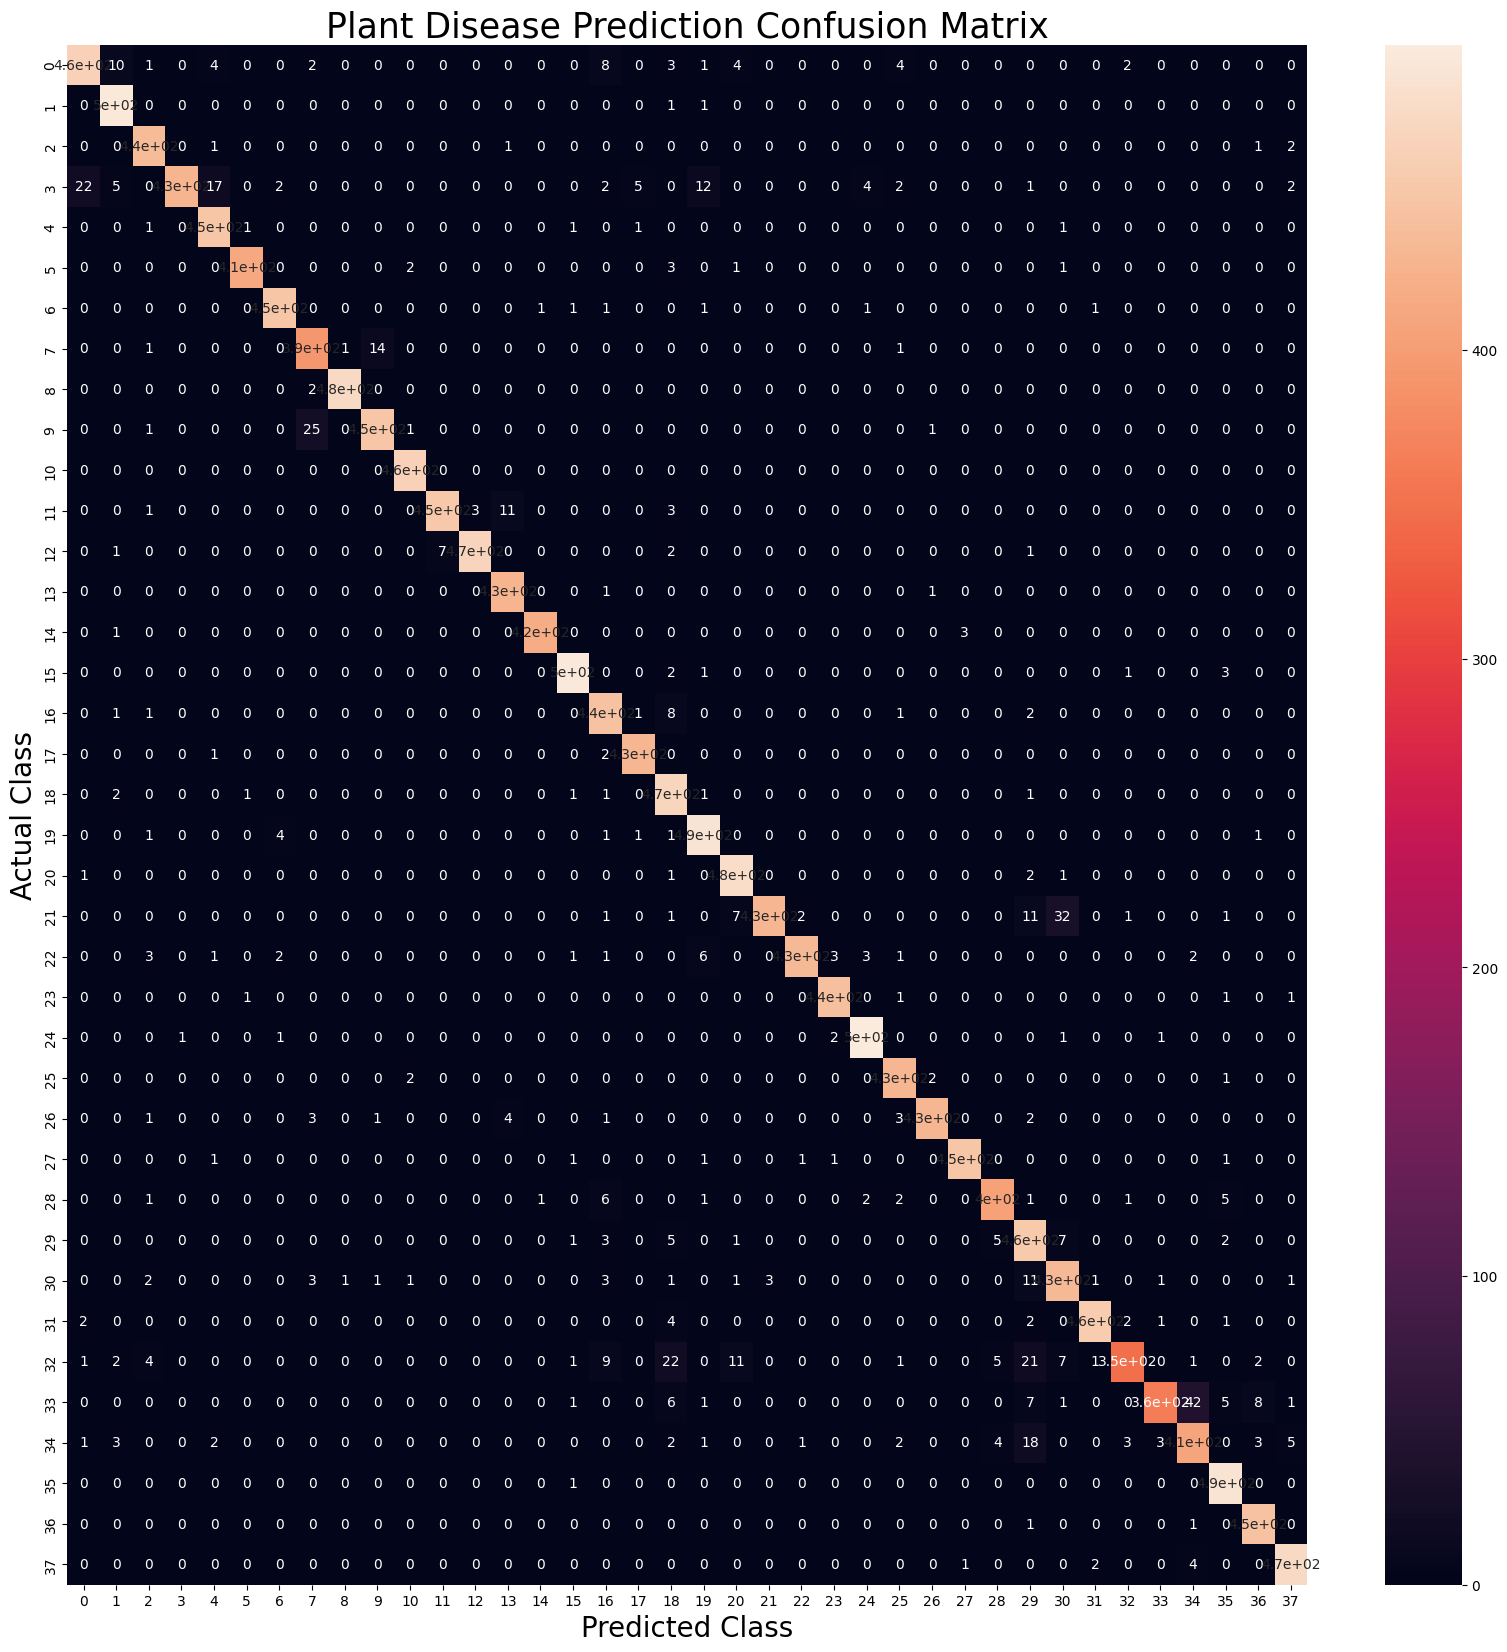

In [48]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()